In [6]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '/Users/carlogress/Documents/GitHub/TaD-final-assignment/speeches.csv'

# Read the CSV file into a DataFrame
all_speeches_df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(all_speeches_df)


     year                                             header  \
0    2023                  Remarks by OPEC Secretary General   
1    2023                  Address by OPEC Secretary General   
2    2023                  Address by OPEC Secretary General   
3    2022  OPEC Statement to the UN Climate Change Confer...   
4    2022          Keynote address by OPEC Secretary General   
..    ...                                                ...   
332  2003       Challenges to OPEC in the Medium & Long Term   
333  2003  Cooperation between producers & consumers: an ...   
334  2003  Short- and long-term oil price trends in the a...   
335  2003  Statement by OPEC Secretary General to the Ara...   
336  2003               The Role of OPEC in the 21st Century   

                                           information  \
0    Delivered by HE Haitham Al Ghais, OPEC Secreta...   
1    Delivered by HE Haitham Al Ghais, OPEC Secreta...   
2    Delivered by HE Haitham Al Ghais, OPEC Secreta...   

In [10]:
import torch
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load the pre-trained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("manifesto-project/manifestoberta-xlm-roberta-56policy-topics-sentence-2023-1-1")
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-large")

# Function to classify each speech and return category and value
def classify_speech(speech):
    inputs = tokenizer(speech,
                       return_tensors="pt",
                       max_length=200,
                       padding="max_length",
                       truncation=True
                       )
    
    logits = model(**inputs).logits
    probabilities = torch.softmax(logits, dim=1).tolist()[0]
    probabilities = {model.config.id2label[index]: round(probability * 100, 2) for index, probability in enumerate(probabilities)}
    probabilities = dict(sorted(probabilities.items(), key=lambda item: item[1], reverse=True))
    
    predicted_category = model.config.id2label[logits.argmax().item()]
    predicted_value = probabilities[predicted_category]

    return predicted_category, predicted_value

# Apply the classification function to the 'speech' column and create new 'category' and 'value' columns
all_speeches[['category', 'value']] = all_speeches['speech'].apply(classify_speech).apply(pd.Series)

# Convert the 'year' column to numeric
all_speeches['year'] = pd.to_numeric(all_speeches['year'], errors='coerce')

# Group by 'year' and print the first row for each group
first_row_per_year = all_speeches.groupby('year').first()[['name', 'category', 'value']]

# Display the result with a more readable format
print(first_row_per_year.to_string())



                                         name                                       category  value
year                                                                                               
2003                Dr. Alvaro Silva-Calderón               109 - Internationalism: Negative  14.53
2004                         Dr Maizar Rahman  101 - Foreign Special Relationships: Positive  61.09
2005  HE Sheikh Ahmad Fahad Al-Ahmad Al-Sabah               107 - Internationalism: Positive  41.46
2006                        Mr. Mohamed Hamel               107 - Internationalism: Positive  57.32
2007                HE Abdalla Salem El-Badri               107 - Internationalism: Positive  47.61
2008                HE Abdalla Salem El-Badri                           408 - Economic Goals  19.80
2009                HE Abdalla Salem El-Badri                        403 - Market Regulation  36.81
2010                HE Abdalla Salem El-Badri               107 - Internationalism: Positive  43.44


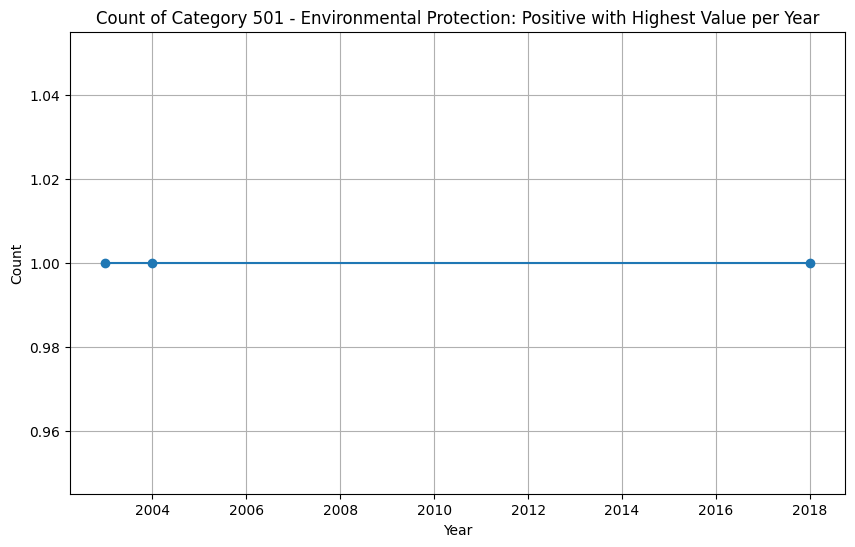

In [11]:
import matplotlib.pyplot as plt
# Filter the DataFrame to include only the desired category
env_protection_df = all_speeches[all_speeches['category'] == '501 - Environmental Protection: Positive']

# Group by 'year' and find the count of occurrences with the highest value per year
count_per_year = env_protection_df.groupby('year')['value'].idxmax().reset_index().groupby('year').count()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(count_per_year.index, count_per_year['value'], marker='o')
plt.title('Count of Category 501 - Environmental Protection: Positive with Highest Value per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

/var/folders/yz/j2f_2fj52f1dq645xw5z31lm0000gn/T/ipykernel_27385/374966850.py:36: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = most_assigned_per_year.groupby(['year'])['count'].transform(max) == most_assigned_per_year['count']


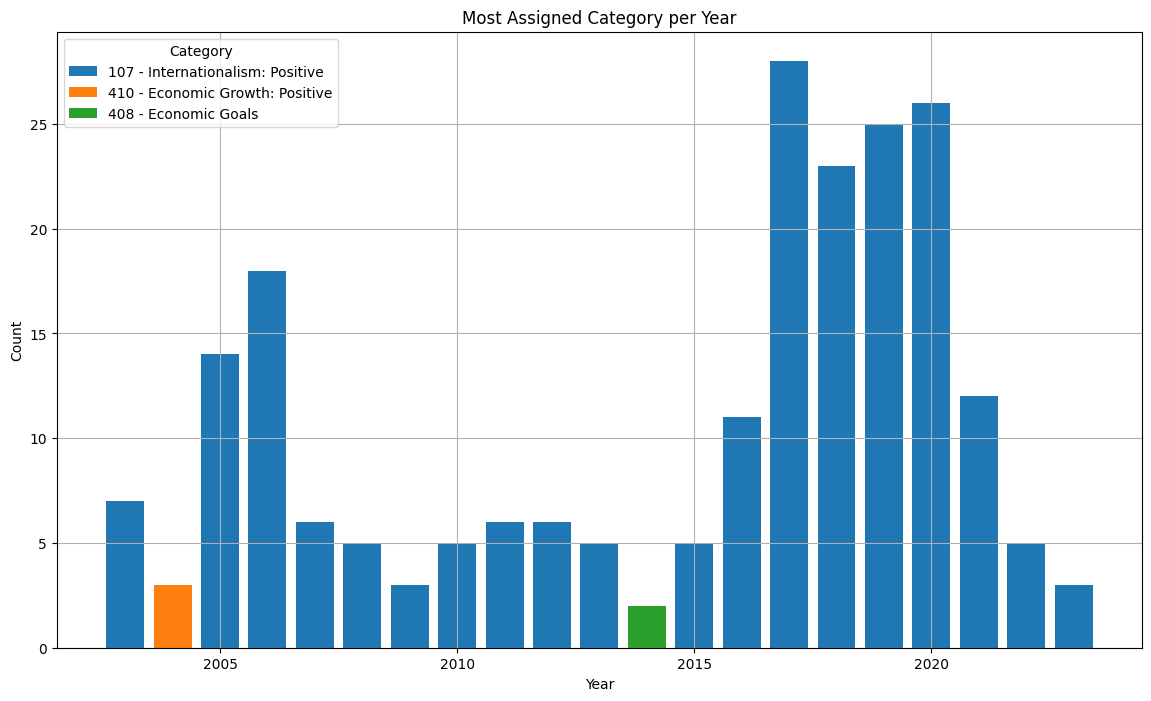

In [5]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load the pre-trained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("manifesto-project/manifestoberta-xlm-roberta-56policy-topics-sentence-2023-1-1")
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-large")

# Assuming your DataFrame is named 'all_speeches' and the column containing speech information is named 'speech'
# Replace 'all_speeches' and 'speech' with your actual DataFrame and column names
all_speeches = pd.read_csv('/Users/carlogress/Documents/GitHub/TaD-final-assignment/speeches.csv')  # replace with the actual path

def classify_speech(speech):
    inputs = tokenizer(speech,
                       return_tensors="pt",
                       max_length=200,
                       padding="max_length",
                       truncation=True
                       )
    
    logits = model(**inputs).logits
    probabilities = torch.softmax(logits, dim=1).tolist()[0]
    predicted_category = model.config.id2label[logits.argmax().item()]

    return predicted_category

# Apply the classification function to the 'speech' column and create a new 'category' column
all_speeches['category'] = all_speeches['speech'].apply(classify_speech)

# Convert the 'year' column to numeric
all_speeches['year'] = pd.to_numeric(all_speeches['year'], errors='coerce')

# Group by 'year' and find the most assigned category per year
most_assigned_per_year = all_speeches.groupby(['year', 'category']).size().reset_index(name='count')
idx = most_assigned_per_year.groupby(['year'])['count'].transform(max) == most_assigned_per_year['count']
most_assigned_per_year = most_assigned_per_year[idx]

# Plot the data as a bar plot
plt.figure(figsize=(14, 8))
for category in most_assigned_per_year['category'].unique():
    category_data = most_assigned_per_year[most_assigned_per_year['category'] == category]
    plt.bar(category_data['year'], category_data['count'], label=category)

plt.title('Most Assigned Category per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Category')
plt.grid(True)

# Save the plot as an image
plt.savefig('berta_top_category.png')

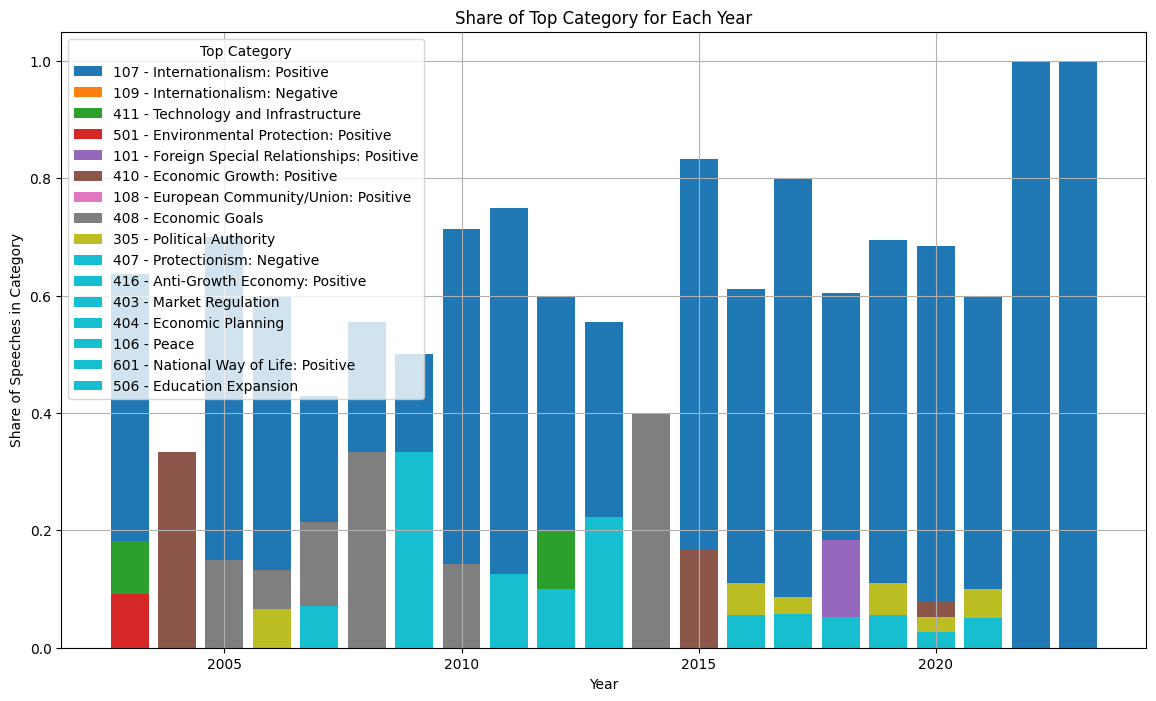

In [15]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load the pre-trained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("manifesto-project/manifestoberta-xlm-roberta-56policy-topics-sentence-2023-1-1")
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-large")

# Assuming your DataFrame is named 'all_speeches' and the column containing speech information is named 'speech'
# Replace 'all_speeches' and 'speech' with your actual DataFrame and column names
all_speeches = pd.read_csv('speeches.csv')  # replace with the actual path

# Function to classify each speech and return the top category
def classify_top_category(speech):
    inputs = tokenizer(speech,
                       return_tensors="pt",
                       max_length=200,
                       padding="max_length",
                       truncation=True
                       )
    
    logits = model(**inputs).logits
    predicted_category = model.config.id2label[logits.argmax().item()]

    return predicted_category

# Apply the classification function to get the top category for each speech
all_speeches['top_category'] = all_speeches['speech'].apply(classify_top_category)

# Convert the 'year' column to numeric
all_speeches['year'] = pd.to_numeric(all_speeches['year'], errors='coerce')

# Group by 'year' to count total speeches and the top category
speech_counts = all_speeches.groupby(['year', 'top_category']).size().reset_index(name='count')

# Calculate the share of the top category for each year
speech_counts['share'] = speech_counts.groupby('year')['count'].transform(lambda x: x / x.sum())

# Set up colors and labels for each category
colors = plt.cm.tab10(range(len(speech_counts['top_category'].unique())))
category_colors = dict(zip(speech_counts['top_category'].unique(), colors))

# Plot the data
plt.figure(figsize=(14, 8))
for category, color in category_colors.items():
    category_data = speech_counts[speech_counts['top_category'] == category]
    plt.bar(category_data['year'], category_data['share'], color=color, label=category)

plt.title('Share of Top Category for Each Year')
plt.xlabel('Year')
plt.ylabel('Share of Speeches in Category')
plt.legend(title='Top Category')
plt.grid(True)

# Save the plot as an image
plt.savefig('share_of_top_category_per_year.png')
plt.show()
